# Atelier  : ANOVA

les noms  : 
1. OISSAFE Imad 
2. LATRACH EL Habib
3. ENNASTY Hamza

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

## Partie 1 : ANOVA à un facteur avec mesures répétées 

Le jeu de données consiste en des mesures de pression artérielle de 15 patients effectuées à quatre moments différents (Time 1, Time 2, Time 3, Time 4). Chaque patient a été évalué à ces quatre périodes, et les données enregistrées représentent la pression artérielle mesurée à chaque session.

`les hypothèses`
1. H0 (hypothèse nulle) : Il n'y a pas de différence significative entre les moyennes des mesures de pression artérielle à différents moments (Time 1, Time 2, Time 3, Time 4) et toutes les différences observées sont dues au hasard.
2. H1 (hypothèse alternative) : Au moins une des moyennes des mesures de pression artérielle à différents moments est différente des autres.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway , shapiro
import matplotlib.pyplot as plt

In [22]:
# importation de jeu donnees

df = pd.read_csv('dataset.csv').drop(columns=['Unnamed: 0'])
df

,time1,time2,time3,time4
0,110,149,145,134
1,113,133,134,125
2,113,134,139,136
3,149,127,129,150
4,119,147,129,123
5,129,135,124,123
6,131,123,149,150
7,146,118,142,138
8,133,119,111,120
9,116,130,119,135


`visualisation de donnees`

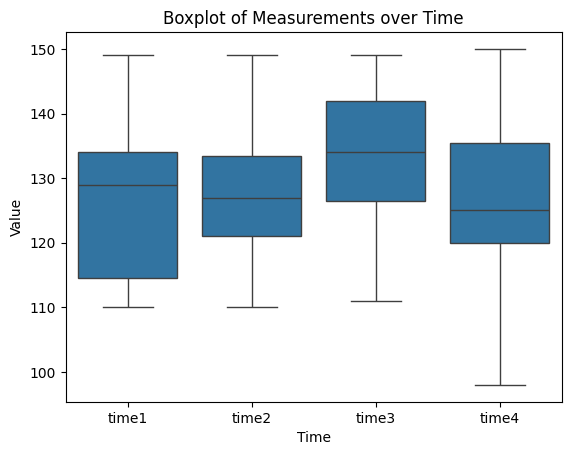

In [23]:


# Melt DataFrame from wide format to long format for easier plotting
df_melted = df.melt(var_name="Time", value_name="Value")

# Create a boxplot
sns.boxplot(x='Time', y='Value', data=df_melted)
plt.title('Boxplot of Measurements over Time')
plt.show()


 les boîtes dans le boxplot sont relativement similaires en taille et que les médianes sont proches les unes des autres, cela suggère que la dispersion des données à travers les différents moments est similaire.

**test de normalite des groupes**

In [24]:
# test de shapiro pour verifier la normalite des donnees

for i in df.columns:
    print(i, shapiro(df[i]))

    if shapiro(df[i])[1] < 0.05:
        print('---> la distribution de', i, 'n est pas normale')
        print('-'*50)
    else:
        print('---> la distribution de', i, 'est normale')
        print('-'*50)


time1 ShapiroResult(statistic=0.9114684462547302, pvalue=0.1426154524087906)
---> la distribution de time1 est normale
--------------------------------------------------
time2 ShapiroResult(statistic=0.9630049467086792, pvalue=0.7444441914558411)
---> la distribution de time2 est normale
--------------------------------------------------
time3 ShapiroResult(statistic=0.9454562067985535, pvalue=0.4559266269207001)
---> la distribution de time3 est normale
--------------------------------------------------
time4 ShapiroResult(statistic=0.9387900233268738, pvalue=0.36739906668663025)
---> la distribution de time4 est normale
--------------------------------------------------


**test de homogeneite des variances**

In [25]:
from scipy.stats import levene

# Perform Levene's test
stat, p = levene(df['time1'], df['time2'], df['time3'], df['time4'])

# affichage des resultats
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("les variances sont egales")
else:
    print("les variances ne sont pas egales")

Statistics=0.721, p=0.544
les variances sont egales


les condition sont vérifier, donc on peut appliquer le test ANOVA

In [28]:

f_val, p_val = f_oneway(df['time1'], df['time2'], df['time3'], df['time4'])

print("Resultat de test : F =", f_val, ", p =", p_val)

Resultat de test : F = 0.8900658614212926 , p = 0.4519906064207322


`interpretation du resultats`

1. L'F-score (0.89) est relativement proche de 1, ce qui suggère que la variance entre les moyennes des groupes est similaire à la variance à l'intérieur des groupes.

2. La p-value associée (0.452) est supérieure à un seuil de signification de 0.05. Cette p-value élevée indique qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle. En d'autres termes, cela suggère qu'il n'y a pas de différence significative entre les moyennes des mesures de pression artérielle à différents moments (Time 1, Time 2, Time 3, Time 4).